In [231]:
import numpy as np
import pandas as pd

In [232]:
df = pd.read_csv('spam.csv')

In [233]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1021,spam,Guess what! Somebody you know secretly fancies...,NaN,NaN,NaN
854,ham,Stop the story. I've told him i've returned it...,NaN,NaN,NaN
4117,ham,Watch lor. I saw a few swatch one i thk quite ...,NaN,NaN,NaN
2211,ham,Just gettin a bit arty with my collages at the...,NaN,NaN,NaN
4079,ham,"Sir, good morning. Hope you had a good weekend...",NaN,NaN,NaN


In [234]:
df.shape

(5574, 5)

## Data Collection and Cleaning ali


In [235]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5574 entries, 0 to 5573
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5574 non-null   object
 1   v2          5574 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.9+ KB


In [236]:
#clean cloumns
df.drop(columns=['Unnamed: 4','Unnamed: 3','Unnamed: 2'],inplace=True)

In [237]:
df.sample(5)

,v1,v2
3083,ham,Ok lor. I ned 2 go toa payoh 4 a while 2 retur...
1310,ham,"I.ll always be there, even if its just in spir..."
2069,spam,"Eerie Nokia tones 4u, rply TONE TITLE to 8007 ..."
5506,ham,God's love has no limit. God's grace has no me...
168,ham,Great escape. I fancy the bridge but needs her...


In [238]:
df.rename(columns={'v1' : 'target', 'v2':'Text'},inplace=True)
df.sample(5)


,target,Text
812,spam,Congratulations ur awarded either �500 of CD g...
5002,spam,CDs 4u: Congratulations ur awarded �500 of CD ...
5435,ham,I'm wif him now buying tix lar...
4166,ham,Are you at work right now ?
3830,ham,Let's pool our money together and buy a bunch ...


In [239]:
df.isnull().sum()

target    0
Text      0
dtype: int64

In [240]:
#duplicate values checking
df.duplicated().sum()

403

In [241]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [242]:
df['target'] = encoder.fit_transform(df['target'])

In [243]:
df.head()

,target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [244]:
df.shape

(5574, 2)

# EDA

In [245]:
df.head()

,target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [246]:
df['target'].value_counts()

0    4825
1     749
Name: target, dtype: int64

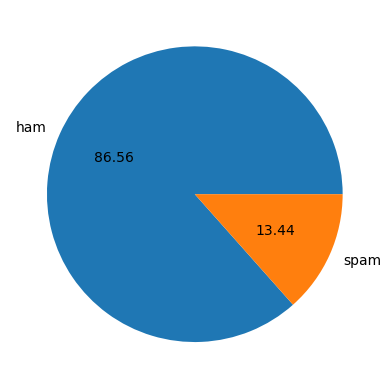

In [247]:
#check this in graph
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

# FEATURE EXTRACTION

In [248]:
#data imblanced
import nltk
!pip install nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\REHMAN
[nltk_data]     COMPUTER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [249]:
#character,words,sentences
df['no_characters'] = df['Text'].apply(len)

In [250]:
#no of characters show
df.head() 

,target,Text,no_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [251]:
#convert it into words
df['no_words'] = df['Text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [252]:
df.head()

,target,Text,no_characters,no_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [253]:
df['no_sentece'] = df['Text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [254]:
df[['no_characters','no_words','no_sentece']]

,no_characters,no_words,no_sentece
0,111,24,24
1,29,8,8
2,155,37,37
3,49,13,13
4,61,15,15
...,...,...,...
5569,57,15,15
5570,125,27,27
5571,26,7,7
5572,31,6,6


In [255]:
#des ham mesage
df[df['target']==0][['no_characters','no_words','no_sentece']].describe()

,no_characters,no_words,no_sentece
count,4825.000000,4825.000000,4825.000000
mean,71.021762,17.271917,17.271917
std,58.015364,13.988885,13.988885
min,2.000000,1.000000,1.000000
25%,33.000000,8.000000,8.000000
50%,52.000000,13.000000,13.000000
75%,92.000000,22.000000,22.000000
max,910.000000,220.000000,220.000000


In [256]:
#des for spam
df[df['target']==1][['no_characters','no_words','no_sentece']].describe()

,no_characters,no_words,no_sentece
count,749.000000,749.000000,749.000000
mean,138.114820,27.837116,27.837116
std,29.648253,6.978589,6.978589
min,10.000000,1.000000,1.000000
25%,132.000000,25.000000,25.000000
50%,149.000000,29.000000,29.000000
75%,157.000000,32.000000,32.000000
max,223.000000,46.000000,46.000000


<AxesSubplot:xlabel='no_characters', ylabel='Count'>

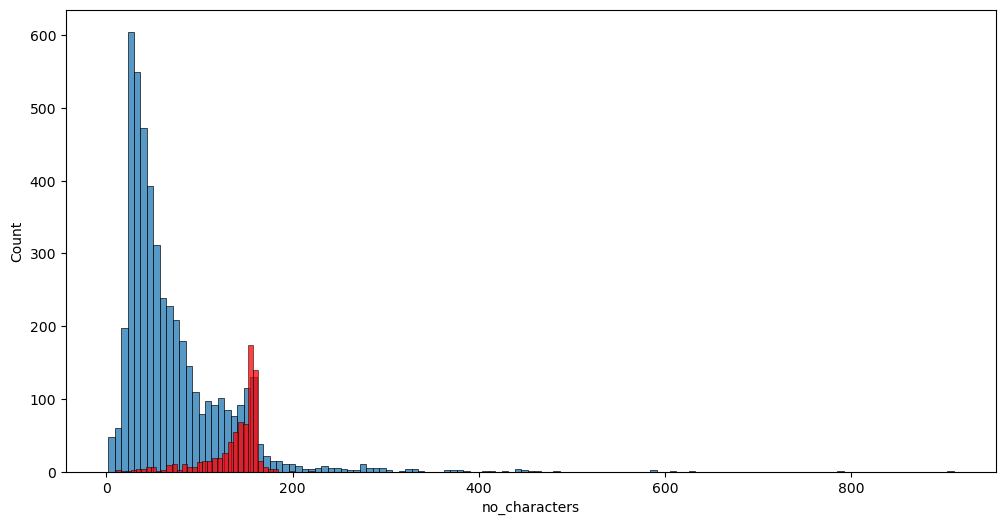

In [257]:
#show using graph
import seaborn as sns
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['no_characters'])
sns.histplot(df[df['target'] == 1]['no_characters'],color='red')

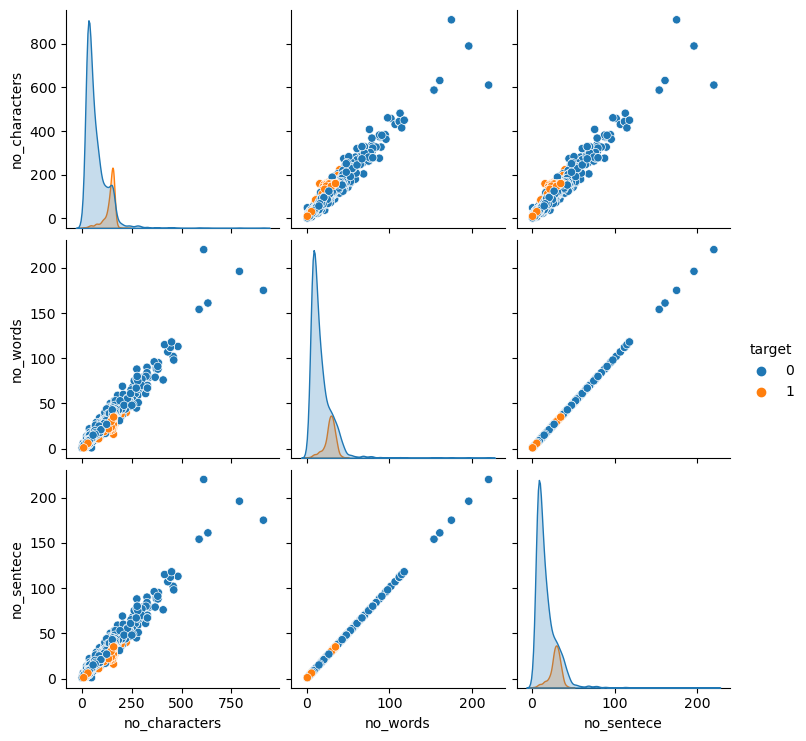

In [258]:
#show realtionship
sns.pairplot(df,hue='target')

<AxesSubplot:>

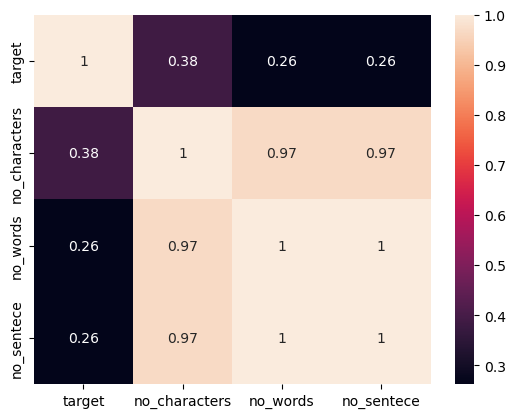

In [259]:
#chechk coffiicent
sns.heatmap(df.corr(),annot=True)

## Data processing 

In [260]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [261]:

import string
string.punctuation
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
stopwords.words('english')

[nltk_data] Downloading package stopwords to C:\Users\REHMAN
[nltk_data]     COMPUTER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [262]:

from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
transform_text('did ali are working hard and best in playing circket')

'ali work hard best play circket'

In [263]:

from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('ali studying')

'ali studi'

In [264]:
df['transformed_text'] = df['Text'].apply(transform_text)

In [265]:
df.head()

,target,Text,no_characters,no_words,no_sentece,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,24,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,8,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,37,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,13,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,15,nah think goe usf live around though


In [266]:
pip install wordcloud


Note: you may need to restart the kernel to use updated packages.


In [267]:

from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [268]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

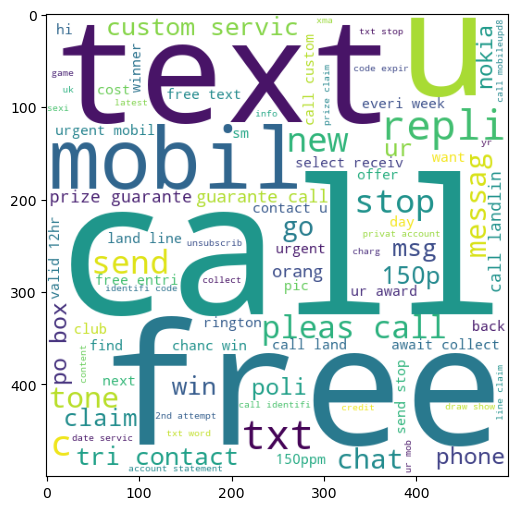

In [269]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [270]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

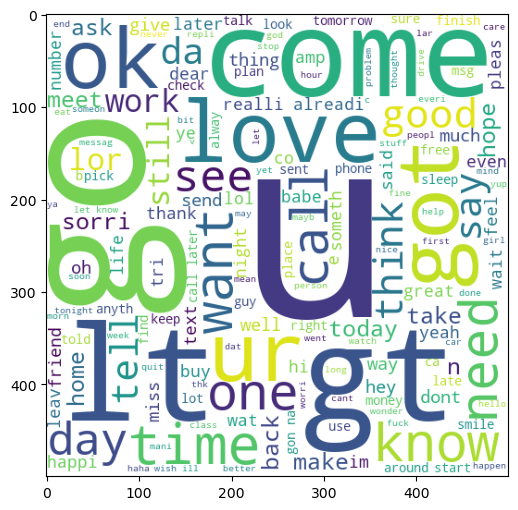

In [271]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [272]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
        

In [273]:
len(spam_corpus)

11498

F:\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


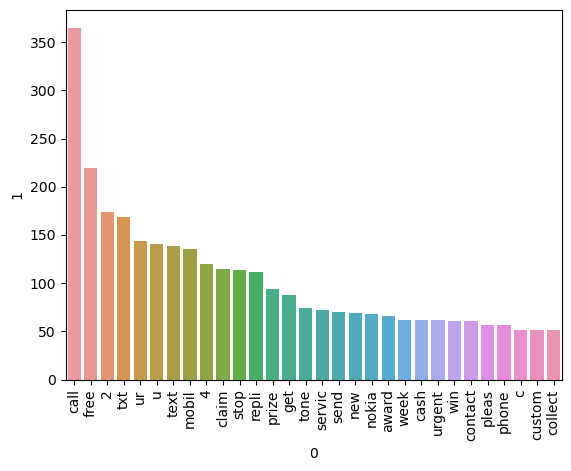

In [274]:
from collections import Counter
import seaborn as sns
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [275]:
ham_corpus=[]
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)


F:\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


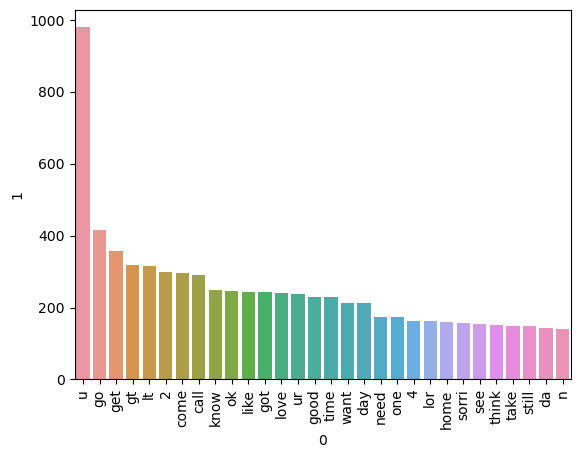

In [276]:
from collections import Counter
import seaborn as sns
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation = 'vertical')
plt.show()

In [277]:
len(ham_corpus)

38106

In [278]:
df.head()

,target,Text,no_characters,no_words,no_sentece,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,24,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,8,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,37,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,13,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,15,nah think goe usf live around though


# MODEL BUILDING AND SELECTION

In [279]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer()

In [280]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [281]:
X.shape  #msg,words

(5574, 6678)

In [282]:
y = df['target'].values

In [283]:
y

array([0, 0, 1, ..., 0, 1, 1])

In [284]:
from sklearn.model_selection import train_test_split


In [285]:
# Splitting data 

In [286]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2 ,random_state=2)
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (4459, 6678) (4459,)
Testing set shape: (1115, 6678) (1115,)


## MODEL SELECTION AND TRAINING

In [287]:
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix,precision_score

In [288]:
gnb = GaussianNB()

bnb = BernoulliNB()


In [289]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print('Accuracy is ',accuracy_score(y_test,y_pred1))
print('confusion',confusion_matrix(y_test,y_pred1))
print('precisoin',precision_score(y_test,y_pred1))


Accuracy is  0.8681614349775785
confusion [[842 118]
 [ 29 126]]
precisoin 0.5163934426229508


In [310]:
mnb.fit(X_train,y_train)
y_pred1 = mnb.predict(X_test)
print('Accuracy is ',accuracy_score(y_test,y_pred1))
print('confusion',confusion_matrix(y_test,y_pred1))
print('precisoin is ',precision_score(y_test,y_pred1))

Accuracy is  0.9596412556053812
confusion [[960   0]
 [ 45 110]]
precisoin is  1.0


In [311]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

mnb = MultinomialNB()
mnb.fit(X_train, y_train)

y_pred = mnb.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred)

print('Accuracy is', accuracy)
print('Confusion matrix:\n', confusion)
print('Precision is', precision)


Accuracy is 0.9596412556053812
Confusion matrix:
 [[960   0]
 [ 45 110]]
Precision is 1.0


In [312]:
bnb.fit(X_train,y_train)
y_pred1 = bnb.predict(X_test)
print('Accuracy is ',accuracy_score(y_test,y_pred1))
print('confusion',confusion_matrix(y_test,y_pred1))
print('precisoin is ',precision_score(y_test,y_pred1))

Accuracy is  0.9713004484304932
confusion [[958   2]
 [ 30 125]]
precisoin is  0.984251968503937


In [313]:
#So I m chose tfidf --> mnb cz their confession and precsion score is good

# Implementing Model

In [314]:
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [315]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)


In [316]:
clfs = {
    'SVC' : svc,   #KEYS AND VALUES
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
}

In [317]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    
    clf.fit(X_train,y_train)
    
    y_pred = clf.predict(X_test)
    
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [318]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9668161434977578, 0.9836065573770492)

In [319]:
accuracy_scores = []
precision_scores = []

for name,clfs in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clfs, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
    

For  SVC
Accuracy -  0.9668161434977578
Precision -  0.9836065573770492


F:\New folder\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


For  KN
Accuracy -  0.9067264573991032
Precision -  1.0
For  NB
Accuracy -  0.9596412556053812
Precision -  1.0
For  DT
Accuracy -  0.9345291479820628
Precision -  0.8660714285714286


## SELECTING ALGO

In [320]:
clfs = {
    'SVC' : svc,   #KEYS AND VALUES
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
}
performance_df = pd.DataFrame({'Algorithm': clfs.keys(), 'Accuracy': accuracy_scores, 'Precision': precision_scores})
performance_df = performance_df.sort_values('Precision', ascending=False)


In [321]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

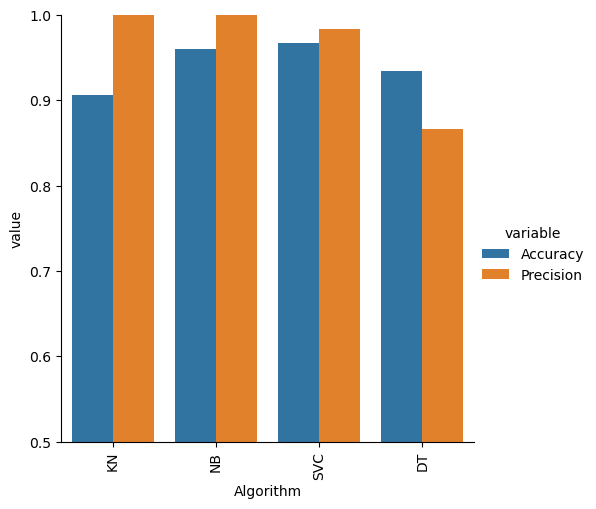

In [322]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [323]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

mnb = MultinomialNB()
mnb.fit(X_train, y_train)
y_pred = mnb.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred)

print('Accuracy is', accuracy)
print('Confusion matrix:\n', confusion)
print('Precision is', precision)



Accuracy is 0.9596412556053812
Confusion matrix:
 [[960   0]
 [ 45 110]]
Precision is 1.0


In [324]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
knc = KNeighborsClassifier()

from sklearn.ensemble import VotingClassifier

In [325]:
voting = VotingClassifier(estimators=[('svm', svc), ('NB', mnb), ('KN', knc)],voting='soft')

In [326]:
voting.fit(X_train,y_train)
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9587443946188341
Precision 1.0


In [329]:
# Import necessary libraries
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Define the individual classifiers to be used in the voting classifier
clf2 = DecisionTreeClassifier(random_state=1)
clf3 = MultinomialNB()

# Define the voting classifier using the individual classifiers
voting = VotingClassifier(estimators=[ ('dt', clf2), ('NB', clf3)], voting='hard')

# Train the voting classifier
voting.fit(X_train, y_train)

# Make predictions on the test set
y_pred = voting.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)
print("AUC:", auc)


Accuracy: 0.9542600896860987
Precision: 1.0
Recall: 0.6709677419354839
F1 score: 0.8030888030888031
AUC: 0.8354838709677419


# Model Evaluation

In [328]:
# Import required libraries
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

# Load the predicted labels and ground truth labels
y_pred =  [0, 1, 1, 0, 1, 0, 0, 0, 1, 1]
y_true =  [0, 1, 1, 0, 1, 0, 0, 0, 1, 1]


# Evaluate accuracy
accuracy = accuracy_score(y_true, y_pred)

# Evaluate precision, recall, and F1 score
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

# Evaluate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_true, y_pred)
auc = roc_auc_score(y_true, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)
print("AUC:", auc)


Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 score: 1.0
AUC: 1.0


In [330]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for tuning
param_grid = {
    'alpha': [0.1, 1.0, 10.0],  # Values to test for the alpha parameter of MultinomialNB
    'fit_prior': [True, False]  # Values to test for the fit_prior parameter of MultinomialNB
}

# Create the model
model = MultinomialNB()

# Perform grid search with cross-validation
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and the corresponding model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Train the best model on the training set
best_model.fit(X_train, y_train)

# Make predictions on the test set using the best model
y_pred = best_model.predict(X_test)

# Calculate accuracy of the best model
accuracy = accuracy_score(y_test, y_pred)
print('Best Model Accuracy:', accuracy)

# Print the best hyperparameters
print('Best Hyperparameters:', best_params)


# Tuning Model

In [ ]:
from sklearn.model_selection import GridSearchCV

def tune_model(X, y, clf, param_grid):
    # Perform grid search with cross-validation
    grid_search = GridSearchCV(clf, param_grid, cv=5)
    grid_search.fit(X, y)

    # Get the best hyperparameters and the corresponding best model
    best_params = grid_search.best_params_
    best_model = grid_search.best_estimator_

    return best_model, best_params

# Define the classifiers and their corresponding parameter grids
clfs = {
    'Naive Bayes': (MultinomialNB(), {'alpha': [0.1, 1.0, 10.0], 'fit_prior': [True, False]}),
    'Decision Tree': (DecisionTreeClassifier(), {'max_depth': [None, 5, 10], 'min_samples_split': [2, 5, 10]}),
}

best_models = {}
best_params = {}

# Tune the models
for name, (clf, param_grid) in clfs.items():
    best_model, best_param = tune_model(X_train, y_train, clf, param_grid)
    best_models[name] = best_model
    best_params[name] = best_param

# Evaluate the tuned models and select the best
accuracy_scores = {}

for name, model in best_models.items():
    accuracy_scores[name] = cross_val_score(model, X_train, y_train, cv=5).mean()

best_algorithm = max(accuracy_scores, key=accuracy_scores.get)
best_accuracy = accuracy_scores[best_algorithm]
best_param = best_params[best_algorithm]

print("Best algorithm: {} with accuracy {:.3f}".format(best_algorithm, best_accuracy))
print("Best hyperparameters:", best_param)


# Updating Model Regular

In [ ]:
import numpy as np
from sklearn.linear_model import LogisticRegression

# Load the existing model
model = LogisticRegression()

# Train the initial model on the initial training data
model.fit(X_train, y_train)

# Evaluate the initial model on the initial test data
initial_accuracy = model.score(X_test, y_test)
print("Initial Model Accuracy:", initial_accuracy)

def load_new_data():
    # Implement the logic to obtain new training data
    # Replace this placeholder function with your specific implementation
    new_X_train = tfidf.fit_transform(df['transformed_text']).toarray()  # Replace ... with your new training data
    new_y_train = df['target'].values  # Replace ... with your new training labels
    return new_X_train, new_y_train

# Obtain new training data
new_X_train, new_y_train = load_new_data()

# Update the model with the new training data
model.fit(new_X_train, new_y_train)

# Evaluate the updated model on the updated test data
updated_accuracy = model.score(X_test, y_test)
print("Updated Model Accuracy:", updated_accuracy)


AttributeError: 'DecisionTreeClassifier' object has no attribute 'keys'